In [278]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from numpy import median,mean

import json
import wordcloud

%matplotlib inline

In [2]:
ls

README.md          data/              eda_project.ipynb


In [3]:
ls data

US_category_id.json  USvideos.csv


In [5]:
!head -1 data/USvideos.csv

In [6]:
data=pd.read_csv('data/USvideos.csv', delimiter=',')
data.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [7]:
data.count()

video_id                  40949
trending_date             40949
title                     40949
channel_title             40949
category_id               40949
publish_time              40949
tags                      40949
views                     40949
likes                     40949
dislikes                  40949
comment_count             40949
thumbnail_link            40949
comments_disabled         40949
ratings_disabled          40949
video_error_or_removed    40949
description               40379
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,40949.0,1.997243e+01,7.568327e+00,1.0,17.0,24.0,25.0,43.0
views,40949.0,2.360785e+06,7.394114e+06,549.0,242329.0,681861.0,1823157.0,225211923.0
likes,40949.0,7.426670e+04,2.288853e+05,0.0,5424.0,18091.0,55417.0,5613827.0
dislikes,40949.0,3.711401e+03,2.902971e+04,0.0,202.0,631.0,1938.0,1674420.0
comment_count,40949.0,8.446804e+03,3.743049e+04,0.0,614.0,1856.0,5755.0,1361580.0


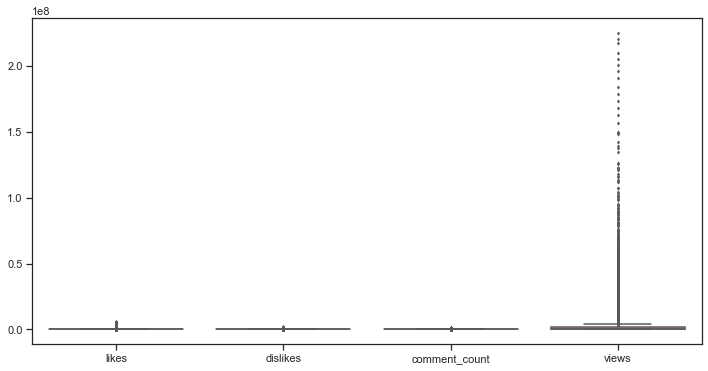

In [304]:
fig, ax = plt.subplots(figsize=(12,6)) 
_=sns.boxplot(data=data, order=['likes','dislikes','comment_count','views'],palette='Set2',fliersize=2)

**What period of time does dataset represent?** 

In [34]:
data['date']=pd.to_datetime(data.iloc[:,5])
data['date'].dt.year.value_counts()
#data['dayofweek']=data['date'].dt.dayofweek
# data['date'].dt.day.value_counts().nlargest()

2018    30279
2017    10428
2013       44
2015       35
2016       35
2014       32
2011       27
2012       24
2010       19
2009       14
2008       11
2006        1
Name: date, dtype: int64

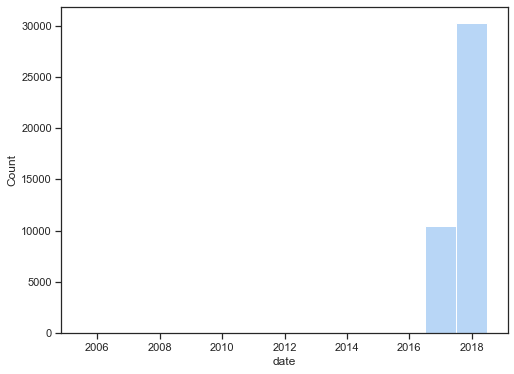

<Figure size 432x288 with 0 Axes>

In [306]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=data, x=data['date'].dt.year, discrete=True)
plt.show()
#plt.savefig('content_date.png', dpi=100)

In [187]:
data.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


**LETS SEE CORRELATION BETWEEN VARIABLES**


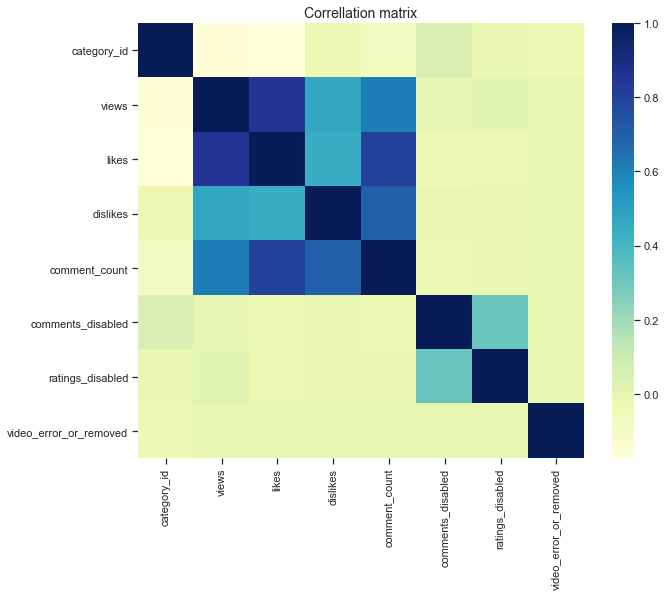

<Figure size 432x288 with 0 Axes>

In [314]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data.corr(), cmap="YlGnBu")
plt.title('Correllation matrix', fontsize=14)
plt.show()

plt.savefig('data_correlation.jpg', dpi=200)

**LETS SEE THE RELATIONSHIPS BETWEEN TWO VARIABLES**

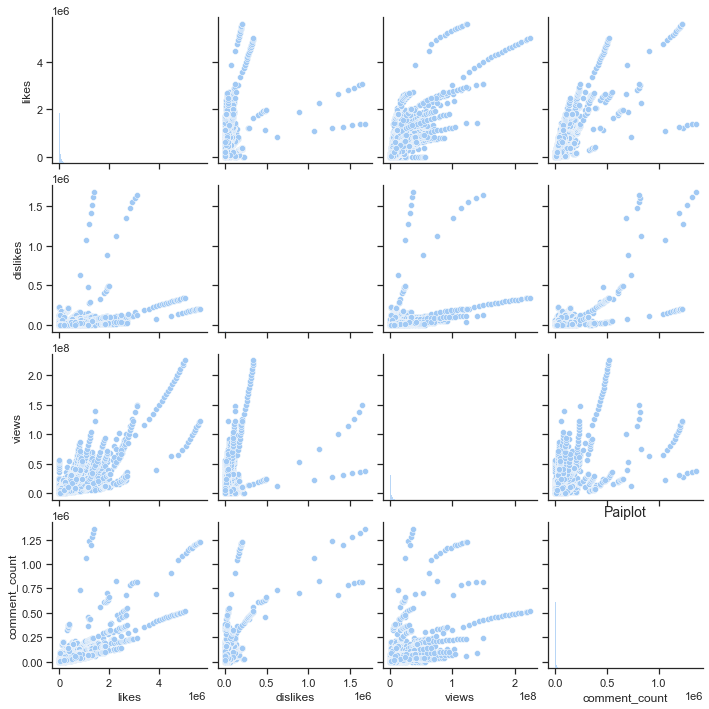

In [315]:
z=data[['likes','dislikes','views','comment_count']]
sns.pairplot(data=z)
plt.title('Paiplot',fontsize=14)
plt.show()

**WHAT CATEGORY HAS MORE CONTENT?**

In [12]:
data.category_id.value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
29      57
43      57
Name: category_id, dtype: int64

**So, we can see the top categories, but what is the name of these?** 

In [13]:
with open('data/US_category_id.json') as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
data['category_name'] = data['category_id'].map(cat_dict)

In [14]:
data.category_name.value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category_name, dtype: int64

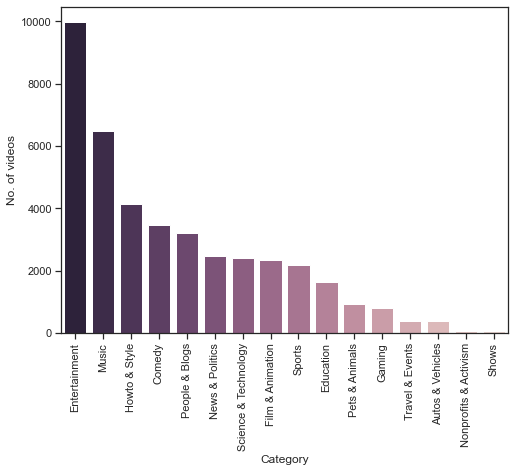

In [316]:
cat_name = data["category_name"].value_counts().to_frame().reset_index()
cat_name.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots(figsize=(8,6))
_ = sns.barplot(x="category_name", y="No_of_videos", data=cat_name, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

plt.savefig('Youtube category.png')

**WHAT VIDEO CONTENT DOES THE  ENTERTAINMENT CATEGORY CONSIST OF?**

In [16]:
max_trend=data[data['category_name']=='Entertainment']
s=max_trend[['title','channel_title']]
s.describe().T

,count,unique,top,freq
title,9964,1645,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,30
channel_title,9964,478,TheEllenShow,193


In [17]:
max_trend.channel_title.value_counts().nlargest(20)


TheEllenShow                            193
Netflix                                 193
Saturday Night Live                     175
The Late Show with Stephen Colbert      161
HellthyJunkFood                         153
Warner Bros. Pictures                   150
FBE                                     149
Good Mythical Morning                   147
Vanity Fair                             144
The Late Late Show with James Corden    137
The Voice                               121
Jimmy Kimmel Live                       118
James Charles                           118
Marvel Entertainment                    117
Binging with Babish                     112
Complex                                 109
E! Entertainment                        108
Star Wars                               106
Universal Pictures                      106
WIRED                                   103
Name: channel_title, dtype: int64

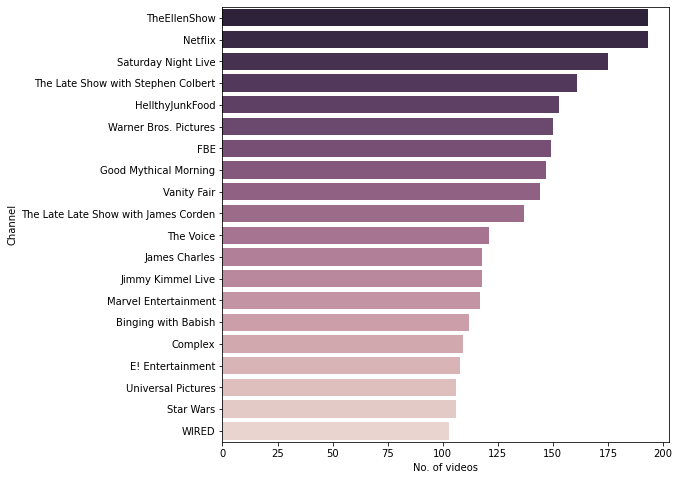

In [61]:
cdf = max_trend.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

**What are the most common words in trending video titles?**

In [58]:
title_words = list(max_trend["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 3655),
 ('-', 2622),
 ('The', 1819),
 ('Trailer', 931),
 ('the', 885),
 ('Official', 738),
 ('a', 673),
 ('to', 610),
 ('with', 598),
 ('2018', 595),
 ('&', 564),
 ('and', 557),
 ('A', 551),
 ('on', 529),
 ('of', 461),
 ('I', 433),
 ('in', 403),
 ('[HD]', 345),
 ('for', 324),
 ('Season', 323),
 ('With', 320),
 ('To', 261),
 ('In', 252),
 ('Star', 252),
 ('How', 236)]

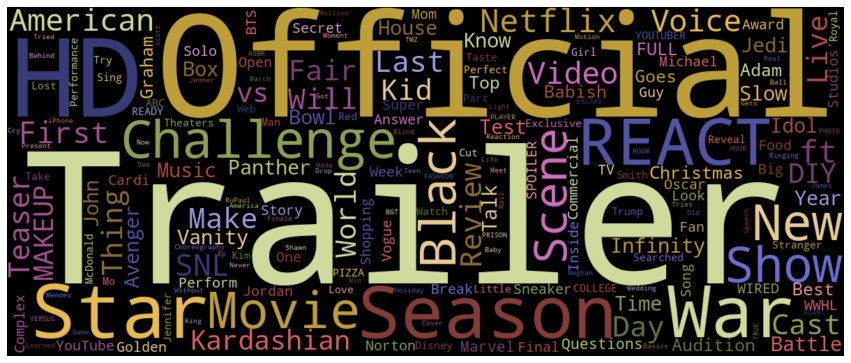

In [60]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="black", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

**LETS SEE LIKES/DISLIKES/VIEWS DISTRIBUTION AMONG TRENDING CONTENT**


In [282]:

data.groupby('category_name').agg('median').sort_values(by='views',ascending=False)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_name,,,,,,,,
Gaming,20.0,1494142.0,51057.0,1956.0,8871.0,False,False,False
Music,10.0,1434128.0,62280.5,1243.5,3906.0,False,False,False
Film & Animation,1.0,1274578.0,25176.0,1022.0,2636.0,False,False,False
Shows,43.0,1155692.0,21537.0,465.0,1648.0,False,False,False
Comedy,23.0,980236.0,30214.0,956.0,2604.0,False,False,False
Entertainment,24.0,734704.0,16234.0,627.0,1693.5,False,False,False
People & Blogs,22.0,599139.0,19438.0,555.5,1678.0,False,False,False
Science & Technology,28.0,585748.0,16328.0,589.0,1734.0,False,False,False
Sports,17.0,559352.0,5700.5,343.0,1127.5,False,False,False


In [296]:
cols=['views', 'likes','dislikes','comment_count']
data.groupby('category_name')[cols].max().sort_values(by='views', ascending=False)

,views,likes,dislikes,comment_count
category_name,,,,
Music,225211923,5613827,343541,1228655
Entertainment,149376127,3093544,1674420,1361580
People & Blogs,56111957,2032463,228426,383762
Film & Animation,54863912,922355,38082,108849
Howto & Style,54155921,605954,66632,203884
Science & Technology,42799458,564804,47469,180913
Comedy,29178096,865679,29865,81051
Sports,29090799,1121217,176903,83660
Autos & Vehicles,25244097,97030,12290,10591


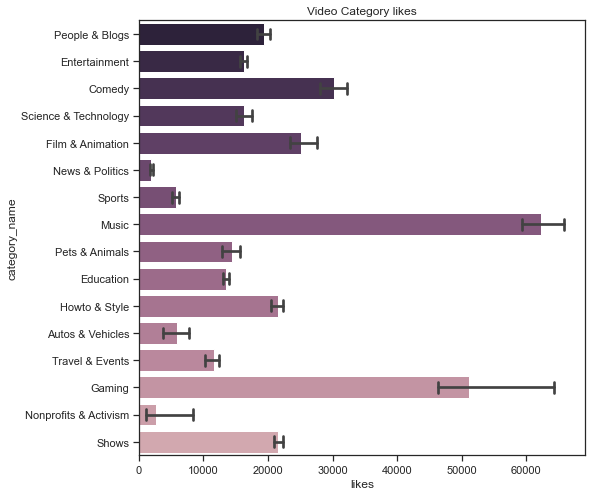

In [125]:
#using barplot to represent central tendency of numaric variables

fig, ax = plt.subplots(figsize=(8,8))
_=sns.barplot(data=data, x='likes', y='category_name', orient='h', estimator=median, capsize=.4,
                  palette=sns.cubehelix_palette(n_colors=20, reverse=True),ax=ax)
_.set_title('Video Category likes');

plt.show()

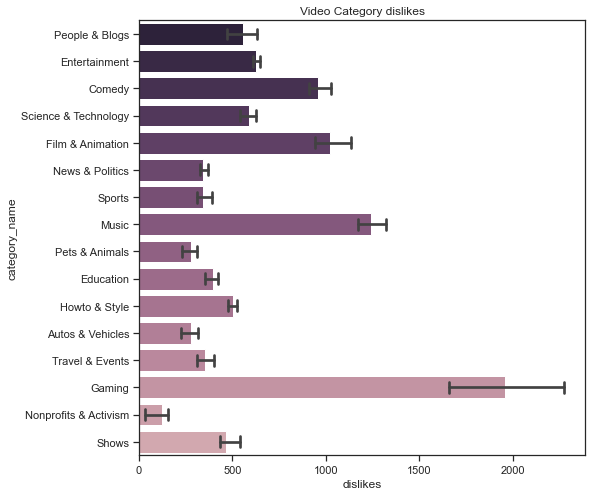

In [124]:
fig, ax = plt.subplots(figsize=(8,8))
_=sns.barplot(data=data, x='dislikes', y='category_name', orient='h', estimator=median,capsize=.4,
                  palette=sns.cubehelix_palette(n_colors=20, reverse=True),ax=ax)
_.set_title('Video Category dislikes');

plt.show()

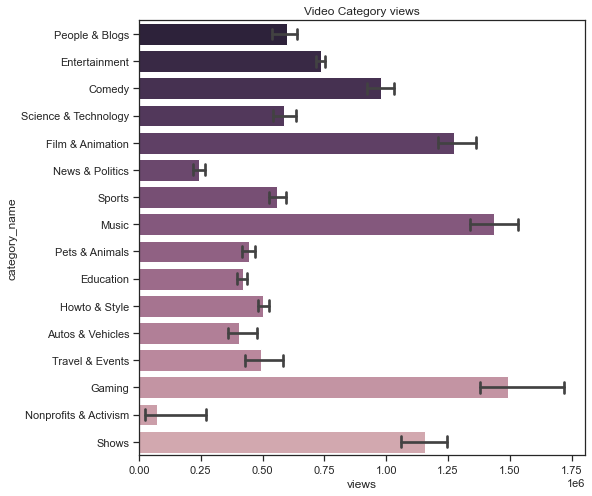

In [299]:
fig, ax = plt.subplots(figsize=(8,8))
_=sns.barplot(data=data, x='views', y='category_name', orient='h', estimator=median, capsize=.4,
                  palette=sns.cubehelix_palette(n_colors=20, reverse=True),ax=ax)
_.set_title('Video Category views');

plt.show()

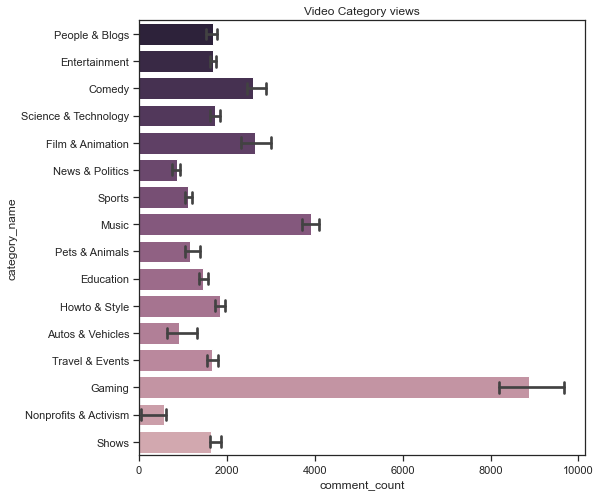

In [126]:
fig, ax = plt.subplots(figsize=(8,8))
_=sns.barplot(data=data, x='comment_count', y='category_name', orient='h', estimator=median, capsize=.4,
                  palette=sns.cubehelix_palette(n_colors=20, reverse=True),ax=ax)
_.set_title('Video Category views');

plt.show()

**MOST POPULAR CONTENT IN GAMING CATEGORY** 

In [198]:
gaming=data[data['category_name']=='Gaming']
z=gaming[['title','channel_title']]
z.describe().T

,count,unique,top,freq
title,817,104,Official Call of Duty®: Black Ops 4 — Multipla...,26
channel_title,817,65,Nintendo,87


In [298]:
cols=['views','likes','dislikes']
gaming.groupby('title')[['views','likes','dislikes']].max().sort_values(by='views',ascending=False)

,views,likes,dislikes
title,,,
Clash Royale: CLAN WARS IS HERE!,16935442,160896,6813
Clash Royale: Meet the Rascals! (New Card!),15000691,267429,23973
Town Hall 12 Update is Here! (Clash of Clans Official),10531608,122553,7011
Official Call of Duty®: Black Ops 4 — Multiplayer Reveal Trailer,10306119,357079,212976
First Look at Nintendo Labo,10256746,268212,34441
...,...,...,...
Kaz Hirai Stepping Down as Sony CEO - IGN News,23851,610,43
American vs. Brit,21199,151,12
Nintendo Switch Now the Fastest-Selling Home Console in US History - IGN News,8493,309,17


**MOST POPULAR CONTENT IN MUSIC CATEGORY**

In [273]:
music=data[data['category_name']=='Music']
x=music[['title','channel_title']]
x.describe().T

,count,unique,top,freq
title,6472,821,Sam Smith - Pray (Official Video) ft. Logic,29
channel_title,6472,443,PTXofficial,90


In [300]:
music.groupby(['title','channel_title', 'date'])[['views','likes','dislikes']].max().sort_values(by='views',ascending=False)

,,,views,likes,dislikes
title,channel_title,date,,,
Childish Gambino - This Is America (Official Video),ChildishGambinoVEVO,2018-05-06 04:00:07+00:00,225211923,5023450,343541
Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,2018-04-20 04:00:03+00:00,148689896,3094021,129502
"Becky G, Natti Natasha - Sin Pijama (Official Video)",BeckyGVEVO,2018-04-20 10:40:51+00:00,139334502,1425496,119798
BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02+00:00,123010920,5613827,206892
The Weeknd - Call Out My Name (Official Video),TheWeekndVEVO,2018-04-12 16:00:04+00:00,122544931,1427436,40837
...,...,...,...,...,...
mad eye moody - moving eyeball prop,daronjay,2017-11-14 13:25:56+00:00,3896,9,0
IoT kit robot #3,eba era,2014-03-07 22:39:36+00:00,3456,4,4
Carol of the Pugs,Maggie Smith Kühn,2017-11-28 20:10:12+00:00,3411,41,0


**Most viewed Youtube video in dataset**
https://www.youtube.com/watch?v=VYOjWnS4cMY